# 1 Logistic Regression

## 1.1 Visualizing the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load data
data = pd.read_csv("ex2data1.txt", header=None, names=["Exam 1 score", "Exam 2 score", " Chance of admission"])

In [3]:
data.head()

,Exam 1 score,Exam 2 score,Chance of admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.shape

(100, 3)

In [5]:
data.describe()

,Exam 1 score,Exam 2 score,Chance of admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
X = data.iloc[:, :-1].values

In [7]:
X.shape

(100, 2)

In [8]:
y = data.iloc[:, -1:].values

In [9]:
y.shape

(100, 1)

In [10]:
y[y == 1].shape

(60,)

In [11]:
y[y == 0].shape

(40,)

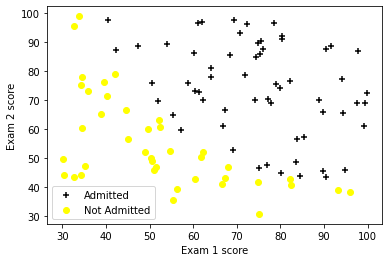

In [12]:
#Visualizing the data
import matplotlib.pyplot as plt

plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], c="black", marker="+")
plt.scatter(X[np.where(y == 0)[0], 0], X[np.where(y == 0)[0], 1], c="yellow", marker="o")

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not Admitted'])

plt.show()

## 1.2 Implementation 

### 1.2.1 Warmup exercise: sigmoid function 

In [13]:
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

In [14]:
print("sigmoid(0) = ", sigmoid(np.array([[0],[10],[-10]])))

sigmoid(0) =  [[5.00000000e-01]
 [9.99954602e-01]
 [4.53978687e-05]]


In [15]:
sigmoid(np.array([[0],[10],[-10]]))[0].item()

0.5

### Cost Fucntion and Gradient 

In [16]:
def costFunction(theta, X, y):
    m = len(y)
    J = 0
    
    #compute z
    z = np.dot(X, theta.reshape((X.shape[1], 1)))
    #compute sigmoid function
    sigmoid = 1 / (1 + np.exp(-z))
    #compute cost
    J = (1/m) * np.sum(-y * np.log(sigmoid) - (np.ones(y.shape) - y) * np.log(1 - sigmoid))
    
    return J

In [17]:
def Gradient(theta, X, y):
    m = len(y)
    J = 0
    grad = np.zeros((theta.shape))
    
    #compute z
    z = np.dot(X, theta.reshape((X.shape[1], 1)))
    #compute sigmoid function
    sigmoid = 1 / (1 + np.exp(-z))
    #compute grad
    grad = (1/m) * np.dot(X.transpose(), (sigmoid - y))
    return grad.flatten()

In [18]:
m, n = X.shape

In [19]:
m

100

In [20]:
n

2

In [21]:
#Add intercept term to x and X_test
X = np.append(np.ones((m, 1)), X, axis=1)

In [22]:
X.shape

(100, 3)

In [23]:
#Intialize fitting parameters
initial_theta = np.zeros(n+1)

In [24]:
initial_theta

array([0., 0., 0.])

In [25]:
#Compute and display initial cost and gradient
cost = costFunction(initial_theta, X, y)
grad = Gradient(initial_theta, X, y)

In [26]:
print("Cost at initial theta (zeros): ", cost)
print("Expected cost (approx): 0.693")

Cost at initial theta (zeros):  0.6931471805599453
Expected cost (approx): 0.693


In [27]:
print("Gradient at test theta: ", grad)
print("Expected gradient (approx): -0.1, -12.0092, -11.2628")

Gradient at test theta:  [ -0.1        -12.00921659 -11.26284221]
Expected gradient (approx): -0.1, -12.0092, -11.2628


In [28]:
#Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]])
cost = costFunction(test_theta, X, y)
grad = Gradient(test_theta, X, y)

In [29]:
print("Cost at initial theta (zeros): ", cost)
print("Expected cost (approx): 0.218")

Cost at initial theta (zeros):  0.21833019382659788
Expected cost (approx): 0.218


In [30]:
print("Gradient at test theta: ", grad)
print("Expected gradient (approx): 0.043, 2.566, 2.647")

Gradient at test theta:  [0.04290299 2.56623412 2.64679737]
Expected gradient (approx): 0.043, 2.566, 2.647


### 1.2.3 Learning parameters  

### https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy 

In [31]:
#using minimize function from scipy library
import scipy.optimize as op

In [32]:
initial_theta.flatten()

array([0., 0., 0.])

In [33]:
optimization = op.minimize(fun=costFunction, x0=initial_theta.flatten(), args=(X, y), method='CG', jac=Gradient)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13168\3417624352.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1/m) * np.sum(-y * np.log(sigmoid) - (np.ones(y.shape) - y) * np.log(1 - sigmoid))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13168\3417624352.py:10: RuntimeWarning: invalid value encountered in multiply
  J = (1/m) * np.sum(-y * np.log(sigmoid) - (np.ones(y.shape) - y) * np.log(1 - sigmoid))


In [34]:
optimization

     fun: 0.203497856355157
     jac: array([-9.59769712e-06, -8.98352890e-07, -7.83884975e-07])
 message: 'Optimization terminated successfully.'
    nfev: 159
     nit: 71
    njev: 159
  status: 0
 success: True
       x: array([-25.1936119 ,   0.20648991,   0.20173277])

In [35]:
print("Cost at theta after optimizing: ", optimization.fun)
print("Expected cost (approx): 0.203")

Cost at theta after optimizing:  0.203497856355157
Expected cost (approx): 0.203


In [36]:
print("Theta: ", optimization.x)
print("Expected theta (approx): -25.161, 0.206, 0.201")

Theta:  [-25.1936119    0.20648991   0.20173277]
Expected theta (approx): -25.161, 0.206, 0.201


### 1.2.4 Evaluating logistic regression 

In [37]:
def predict(theta, X):
    z = np.dot(X, theta)
    prediction = sigmoid(z)
    
    prediction[prediction >= 0.5] = 1
    prediction[prediction < 0.5] = 0
    
    return prediction

In [38]:
optimized_theta = optimization.x.reshape((3, 1))

In [39]:
optimized_theta

array([[-25.1936119 ],
       [  0.20648991],
       [  0.20173277]])

In [40]:
prediction = predict(optimized_theta, X)

In [41]:
prediction.shape

(100, 1)

### Decision Boundary 

In [42]:
def decisionBoundary(theta, X):
    #get 2 values min and max from X
    x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
    #calculate x2 (decision boundery: b + X*theta = 0)
    x2 = -(theta[0] + x1*theta[1]) / theta[2]
    
    return x1, x2

In [43]:
x1, x2 = decisionBoundary(optimized_theta, X)

In [44]:
x1

array([30.05882245, 99.8278578 ])

In [45]:
x2

array([94.11841367, 22.70412736])

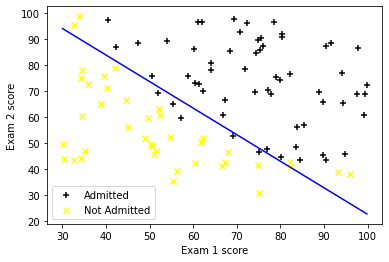

In [46]:
#display decision boundery
import matplotlib.pyplot as plt

plt.scatter(X[np.where(y==1)[0], 1], X[np.where(y==1)[0], 2], c='black', marker='+', label='Admitted')
plt.scatter(X[np.where(y==0)[0], 1], X[np.where(y==0)[0], 2], c='yellow', marker='x', label='Not Admitted')
plt.plot(x1, x2, color='blue')

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()

plt.show()

# Regularized Logistic Regression 

In [47]:
data = pd.read_csv('ex2data2.txt', header=None, names=["Microchip Test 1", "Microchip Test 2", "Accepted"])

In [48]:
data.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [49]:
data.describe()

,Microchip Test 1,Microchip Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [50]:
X = data.iloc[:,:-1].values

In [51]:
X.shape

(118, 2)

In [52]:
y = data.iloc[:, -1:].values

In [53]:
y.shape

(118, 1)

## 2.1 Visualizing the data 

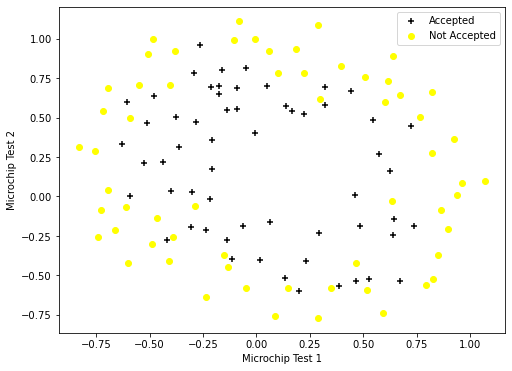

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], c='black', marker='+')
plt.scatter(X[np.where(y==0)[0], 0], X[np.where(y==0)[0], 1], c='yellow', marker='o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['Accepted', 'Not Accepted'])
plt.show()

## 2.2 Feature mapping 

In [55]:
def featureMapping(x1, x2, degree):
    feature_mapping_X = np.ones((x1.shape[0],1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            out1 = pow(x1, i - j)
            out2 = pow(x2, j)
            feature_mapping_X = np.append(feature_mapping_X, out1 * out2, axis=1)

    return feature_mapping_X

In [56]:
degree = 6
x1 = X[:, 0].reshape(y.shape)
x2 = X[:, 1].reshape(y.shape)
X = featureMapping(x1, x2, degree)

In [57]:
X.shape

(118, 28)

In [58]:
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

## 2.3 Cost function and gradient 

In [59]:
#lambda
lamb = 1

In [60]:
initial_theta = np.zeros((X.shape[1]))

In [61]:
initial_theta.shape

(28,)

In [62]:
def regCostFunction(theta, X, y, lamb):
    m = len(y)
    J = 0
    
    #compute z
    z = np.dot(X, theta.reshape((X.shape[1], 1)))
    #compute cost
    J = (1 / m) * np.sum(-y*np.log(sigmoid(z)) - (1 - y)*np.log(1 - sigmoid(z))) + (lamb / (2*m)) * np.sum(np.square(theta[1:]))
    
    return J

In [63]:
def regGradient(theta, X, y, lamb):
    m = len(y)
    
    #compute z
    z = np.dot(X, theta.reshape((X.shape[1], 1)))
    #compute gradient for theta 0
    theta0 = (1 / m) * np.dot(X[:, 0], (sigmoid(z) - y))
    #compute the rest of theta
    reg_theta = (1 / m) * np.dot(X[:, 1:].transpose(), (sigmoid(z) - y)) + (lamb / m) * theta[1:].reshape((X.shape[1]-1, 1))
    
    reg_theta = np.append(np.array([[theta0.item()]]), reg_theta, axis=0)
    
    return reg_theta.flatten()

In [64]:
cost = regCostFunction(initial_theta, X, y, lamb)
grad = regGradient(initial_theta, X, y, lamb)

In [65]:
print('Cost at initial theta (zeros): ', cost);
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros) - first five values only: ', grad[:5]);
print('Expected gradients (approx) - first five values only: ');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros):  0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:  [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected gradients (approx) - first five values only: 
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [66]:
test_theta = np.ones((X.shape[1]))

In [67]:
test_theta.shape

(28,)

In [68]:
#lambda
lamb = 10

In [69]:
cost = regCostFunction(test_theta, X, y, lamb)
grad = regGradient(test_theta, X, y, lamb)

In [70]:
print('Cost at test theta (with lambda = 10): ', cost);
print('Expected cost (approx): 3.16');
print('Gradient at test theta - first five values only:', grad[:5]);
print('Expected gradients (approx) - first five values only:');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at test theta (with lambda = 10):  3.1645093316150095
Expected cost (approx): 3.16
Gradient at test theta - first five values only: [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### 2.3.1 Learning parameters using minimize function from scipy library

In [71]:
lamb = 1

In [72]:
reg_optimization = op.minimize(fun=regCostFunction, x0=initial_theta, args=(X, y, lamb), method='CG', jac=regGradient, options={'maxiter':400})

In [73]:
reg_optimization

     fun: 0.529002731006212
     jac: array([-2.94474513e-07, -1.51969547e-06,  2.34242171e-06,  1.85222484e-06,
       -2.39375137e-06,  4.28896623e-06, -1.35435014e-06,  1.53201137e-06,
       -1.93756259e-07,  7.98303947e-07, -1.50231731e-07, -1.50618936e-06,
        4.86219414e-07, -9.80404978e-07,  1.85536010e-06, -1.27800396e-06,
        7.29819757e-07, -6.57843926e-07,  3.56961994e-07, -2.89407947e-08,
       -2.66030378e-07, -8.48666061e-07, -7.48052742e-07,  1.26073403e-07,
       -6.66921660e-07,  2.79437649e-07, -6.00946281e-07,  2.20299385e-07])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 19
    njev: 55
  status: 0
 success: True
       x: array([ 1.2726322 ,  0.62526851,  1.18110054, -2.01977776, -0.91750968,
       -1.43140105,  0.12396937, -0.36542089, -0.35720348, -0.17516017,
       -1.45817405, -0.05109747, -0.61556197, -0.2747374 , -1.19275643,
       -0.24225813, -0.20594332, -0.04478629, -0.27777193, -0.29534672,
       -0.45647333, -1

In [74]:
reg_cost = reg_optimization.fun
print("cost after optimization for regularization logistic regression: ", reg_cost)

cost after optimization for regularization logistic regression:  0.529002731006212


In [75]:
reg_theta = reg_optimization.x
print("theta after optimization for regularization logistic regression: ", reg_theta)

theta after optimization for regularization logistic regression:  [ 1.2726322   0.62526851  1.18110054 -2.01977776 -0.91750968 -1.43140105
  0.12396937 -0.36542089 -0.35720348 -0.17516017 -1.45817405 -0.05109747
 -0.61556197 -0.2747374  -1.19275643 -0.24225813 -0.20594332 -0.04478629
 -0.27777193 -0.29534672 -0.45647333 -1.04328679  0.02771439 -0.29243876
  0.01551392 -0.3273817  -0.14391016 -0.92473298]


### Non-Linear Decision Boundery

In [76]:
def nonLinearDecisionBoundery(theta, degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U, V = np.meshgrid(u, v)
    
    #convert U, V to vectors for calculating additional, features
    #using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = featureMapping(U.reshape(U.shape[0], 1), V.reshape(V.shape[0], 1), degree)
    Z = X_poly.dot(theta)
    
    #reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U, V, Z, levels=[0], cmap="summer")
    axes.legend(['Accepted','Not Accepted'])
    
    return cs

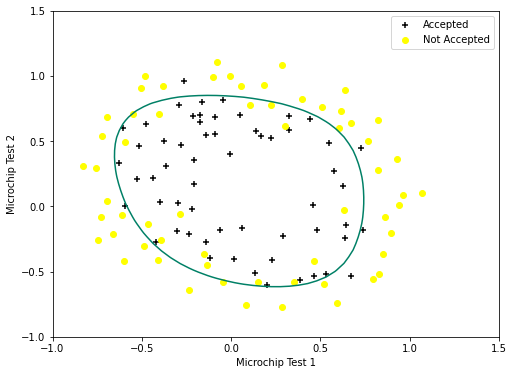

In [77]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(X[np.where(y==1)[0], 1], X[np.where(y==1)[0], 2], c='black', marker='+')
axes.scatter(X[np.where(y==0)[0], 1], X[np.where(y==0)[0], 2], c='yellow', marker='o')
axes.set_xlabel('Microchip Test 1')
axes.set_ylabel('Microchip Test 2')

degree = 6
nonLinearDecisionBoundery(reg_theta, degree, axes)
plt.show()